Gerekli Kütüphanelerin Yüklenmesi

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

Test ve eğitim verilerinin okunması

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YapayZekaOdevleri/leaf-classification/leaf-classification/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YapayZekaOdevleri/leaf-classification/leaf-classification/test.csv')

Sınıfların belirlenmesi ve etiketlenmesi

In [4]:
label_encoder = LabelEncoder().fit(train.species)
labels = label_encoder.transform(train.species)
classes = list(label_encoder.classes_)

Verilerin hazırlanması, özellik ve sınıf sayısının belirlenmesi

In [5]:
train = train.drop(['species','id'], axis=1)
test = test.drop(['id'], axis=1)
nb_features = 192
nb_classes = len(classes)

Eğitim verisindeki verilerin standartlaştırılması

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train.values)
train = scaler.transform(train.values)

Eğitim verisinin eğitim ve doğrulama için ayarlanması

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_valid = train_test_split(train, labels, test_size=0.1, random_state=42)

Etiketlerin kategorilerinin belirlenmesi

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

Giriş verilerinin boyutlarının ayarlanması

In [11]:
X_train = np.array(X_train).reshape(891,192,1)
X_valid = np.array(X_test).reshape(99,192,1)

1DESA Modelinin oluşturulması

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D

model = Sequential()
model.add(Conv1D(512,1,input_shape=(nb_features,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(256,1))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(nb_classes,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 192, 512)            │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 192, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 96, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 96, 256)             │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │      25,167,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 99)                  │         101,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,499,875 (104.90 MB)

 Trainable params: 27,499,875 (104.90 MB)

 Non-trainable params: 0 (0.00 B)

Ağın derlenmesi

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Modelin Eğitilmesi

In [14]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))
#

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 919ms/step - accuracy: 0.1859 - loss: 3.8079 - val_accuracy: 0.8081 - val_loss: 0.9092
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 982ms/step - accuracy: 0.8177 - loss: 0.8404 - val_accuracy: 0.9192 - val_loss: 0.2968
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 32s 645ms/step - accuracy: 0.9485 - loss: 0.2036 - val_accuracy: 0.9495 - val_loss: 0.2629
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9657 - loss: 0.1732 - val_accuracy: 0.9394 - val_loss: 0.2888
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 35s 780ms/step - accuracy: 0.9596 - loss: 0.1656 - val_accuracy: 0.9192 - val_loss: 0.2678
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 781ms/step - accuracy: 0.9526 - loss: 0.1945 - val_accuracy: 0.9293 - val_loss: 0.3280
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 47s 992ms/step - accuracy: 0.9812 - loss: 0.1022 - val_accuracy: 0.9091 - val_loss: 0.3151
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 756ms/step - accuracy: 0.9717 - loss: 0.0872 - val_accurac

Ortalam Değerlerin Gösterilmesi

In [15]:
print("Ortalama Eğitim Kaybı: ",np.mean(model.history.history['loss']))
print("Ortalama Doğrulama Kaybı: ",np.mean(model.history.history['val_loss']))
print("Ortalama Eğitim başarımı:",np.mean(model.history.history['accuracy']))
print("Ortalama Doğrulama başarımı:",np.mean(model.history.history['val_accuracy']))

Ortalama Eğitim Kaybı:  0.3332677504668633
Ortalama Doğrulama Kaybı:  0.2727856278419495
Ortalama Eğitim başarımı: 0.9263000388940176
Ortalama Doğrulama başarımı: 0.931313137213389


Son olarak sonuçlar grafikler üzerinde gösterilir

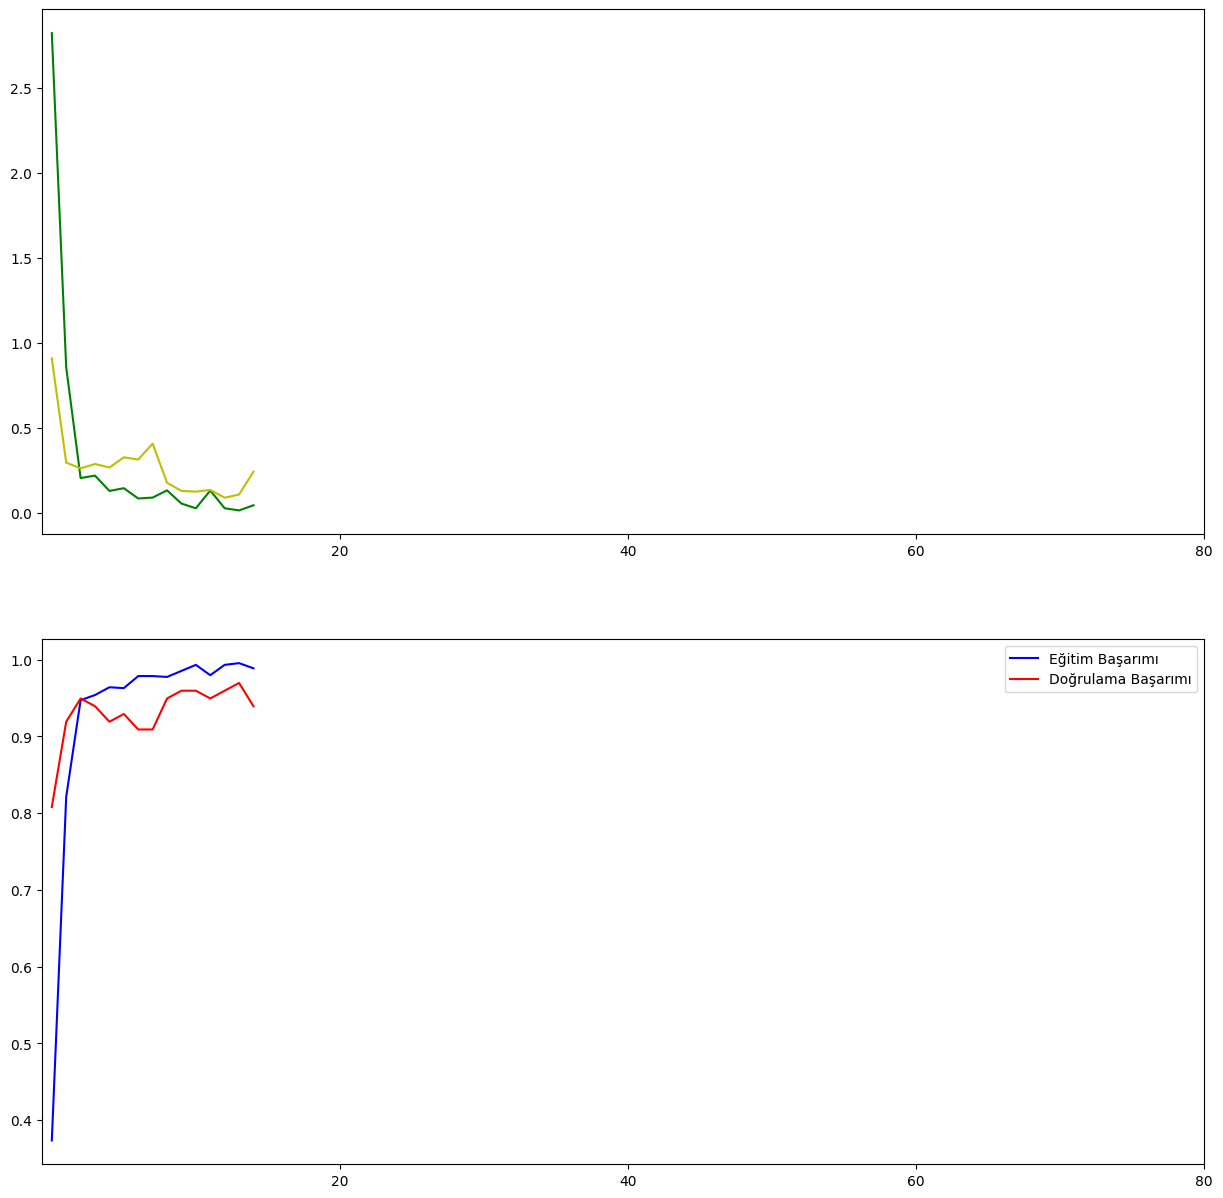

In [17]:
import matplotlib.pyplot as plt
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,15))
ax1.plot(model.history.history['loss'],color='g',label='Eğitim Kaybı')
ax1.plot(model.history.history['val_loss'],color='y',label='Doğrulama Kaybı')
ax1.set_xticks(np.arange(20,100,20))
ax2.plot(model.history.history['accuracy'],color='b',label='Eğitim Başarımı')
ax2.plot(model.history.history['val_accuracy'],color='r',label='Doğrulama Başarımı')
ax2.set_xticks(np.arange(20,100,20))
plt.legend()
plt.show()